In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_df = pd.read_csv("fear_greed_index.csv")
trader_df = pd.read_csv("historical_data.csv")

In [3]:
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])
sentiment_df = sentiment_df[["date", "classification"]]

In [5]:
# # 🧹 Step 2: Clean & preprocess the trader data
trader_df["date"] = pd.to_datetime(trader_df["Timestamp IST"], format="%d-%m-%Y %H:%M")
trader_df["date"] = trader_df["date"].dt.date  # Extract only date part
trader_df["date"] = pd.to_datetime(trader_df["date"])

In [6]:
# # 🧬 Step 3: Merge both datasets on 'date'
merged_df = pd.merge(trader_df, sentiment_df, on="date", how="inner")

In [7]:
# 🧮 Step 4: Grouped analysis of performance based on sentiment
summary_stats = merged_df[["Closed PnL", "classification"]].groupby("classification").describe()
print("📊 Summary of Closed PnL by Sentiment:")
print(summary_stats)

📊 Summary of Closed PnL by Sentiment:
               Closed PnL                                                  \
                    count       mean          std           min  25%  50%   
classification                                                              
Extreme Fear      21400.0  34.537862  1136.056091  -31036.69194  0.0  0.0   
Extreme Greed     39992.0  67.892861   766.828294  -10259.46800  0.0  0.0   
Fear              61837.0  54.290400   935.355438  -35681.74723  0.0  0.0   
Greed             50303.0  42.743559  1116.028390 -117990.10410  0.0  0.0   
Neutral           37686.0  34.307718   517.122220  -24500.00000  0.0  0.0   

                                         
                      75%           max  
classification                           
Extreme Fear     5.635032  115287.00000  
Extreme Greed   10.028709   44223.45187  
Fear             5.590856  135329.09010  
Greed            4.944105   74530.52371  
Neutral          3.995795   48504.09555  


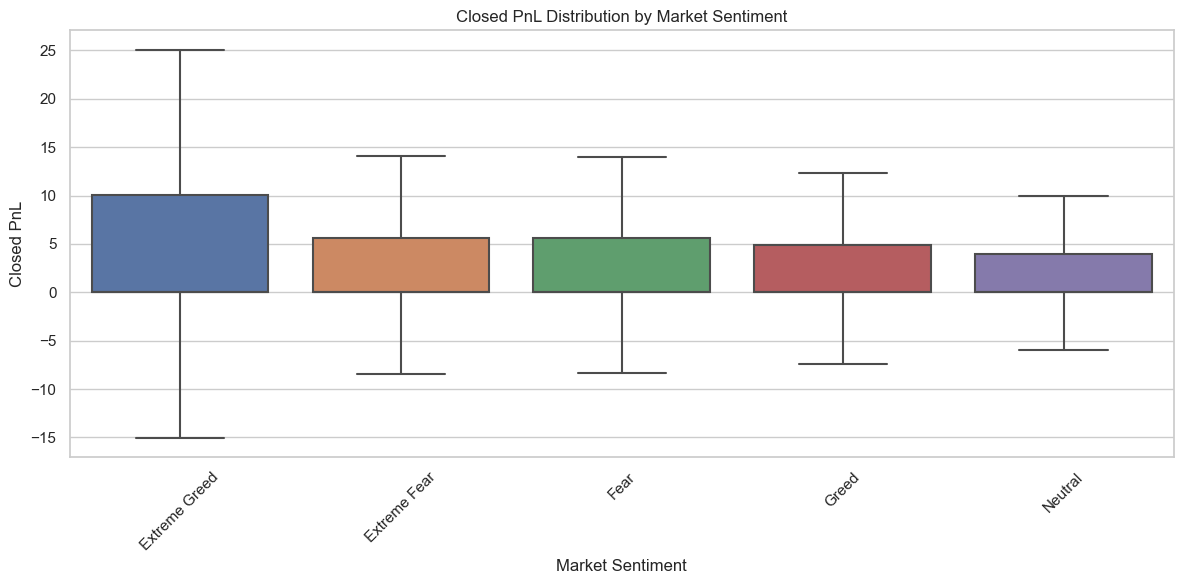

In [8]:
# 📊 Step 5: Visualize performance (Boxplot)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x="classification", y="Closed PnL", data=merged_df, showfliers=False)
plt.title("Closed PnL Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# 🧠 Step 6: Optional deep dive - Count of BUY/SELL by sentiment
buy_sell_count = merged_df.groupby(["classification", "Side"]).size().unstack()
print("\n📈 Trade count by sentiment & side:")
print(buy_sell_count)


📈 Trade count by sentiment & side:
Side              BUY   SELL
classification              
Extreme Fear    10935  10465
Extreme Greed   17940  22052
Fear            30270  31567
Greed           24576  25727
Neutral         18969  18717


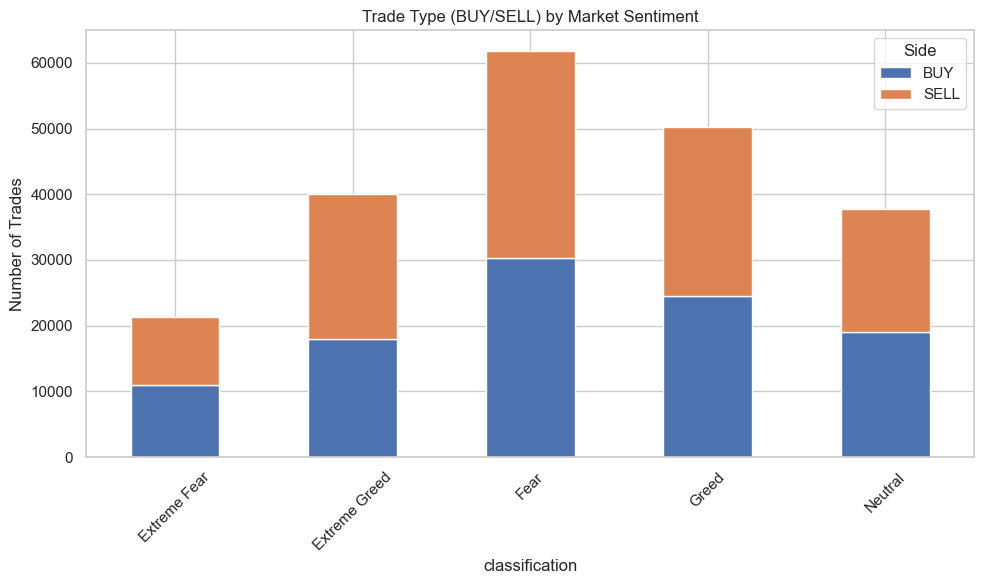

In [10]:
# 📊 Plot trade side distribution
buy_sell_count.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Trade Type (BUY/SELL) by Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



📈 Trade count by sentiment & side:
Side              BUY   SELL
classification              
Extreme Fear    10935  10465
Extreme Greed   17940  22052
Fear            30270  31567
Greed           24576  25727
Neutral         18969  18717
